<a href="https://colab.research.google.com/github/EmilyRothrock/project_chd/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Import dataset
#! git clone https://github.com/DS3001/project_chd
data = pd.read_csv('/content/project_chd/fhs_train.csv')
data = data.drop("Unnamed: 0", axis = 1)
test_data = pd.read_csv('/content/project_chd/fhs_test.csv')
test_data = test_data.drop("Unnamed: 0", axis = 1)

data.head()

Cloning into 'project_chd'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 16 (delta 6), reused 6 (delta 4), pack-reused 6
Receiving objects: 100% (16/16), 754.81 KiB | 3.97 MiB/s, done.
Resolving deltas: 100% (6/6), done.


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [4]:
test_data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0


In [5]:
# Drop NAs
data = data.dropna()
test_data = test_data.dropna()

In [6]:
# Split data into train/test:
X_train = data.drop(['TenYearCHD'],axis=1)
y_train = data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'],axis=1)
y_test = test_data['TenYearCHD']

In [7]:
# Fit model:
model = RandomForestRegressor() # Build a random forest model
rf = model.fit(X_train,y_train) # Fit the rf model

# Make predictions:
y_hat_rf = rf.predict(X_test) # Model predictions

<Axes: xlabel='TenYearCHD'>

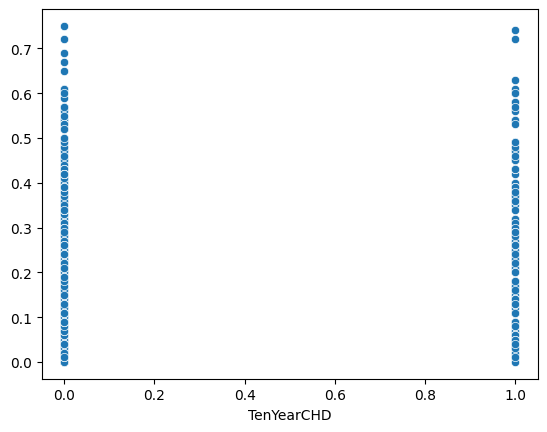

In [8]:
# Scatterplot of predicted v. actual:
sns.scatterplot(x=y_test, y=y_hat_rf) # Predicted v Actual

<Axes: xlabel='TenYearCHD', ylabel='Density'>

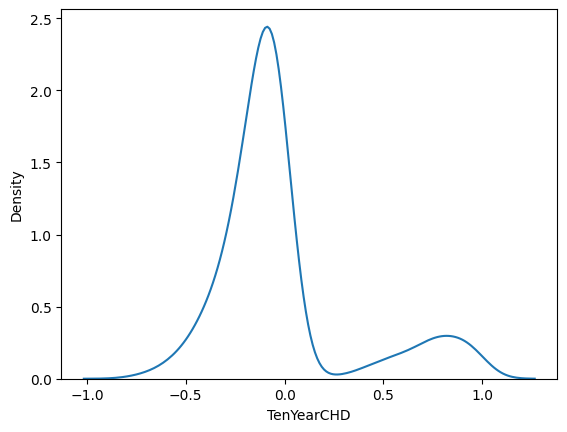

In [9]:
# Residual plot:
residual = y_test - y_hat_rf
sns.kdeplot(x=residual)

In [10]:
rf.score(X_test,y_test) # Rsq measure

0.03538168340184655

<Axes: >

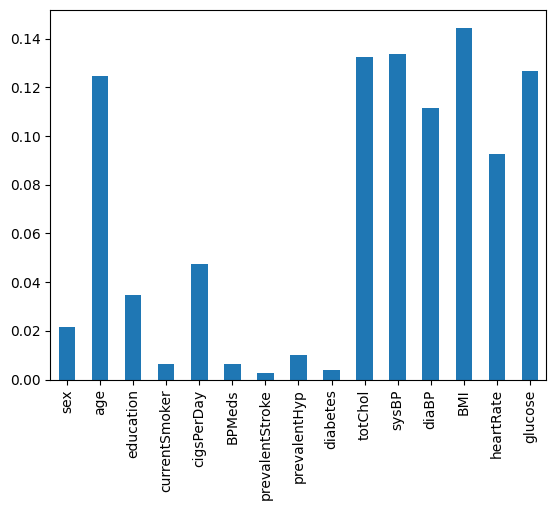

In [12]:
# Variable importance plot:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns )
forest_importances.plot.bar()